In [23]:
# Loading the MNIST Dataset from Kaggle

import idx2numpy
import numpy as np

def load_mnist_images(file_path):
    # Load the images from the IDX file
    images = idx2numpy.convert_from_file(file_path)
    # Reshape the images to have a flat vector representation
    images = images.reshape(images.shape[0], -1)
    # Convert pixel values to float and normalize them to range [0, 1]
    images = images.astype(np.float32)
    return images

def load_mnist_labels(file_path):
    # Load the labels from the IDX file
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# File paths for MNIST train images and labels
train_images_file = r"C:\Users\Akshay Patil\Downloads\archive\train-images.idx3-ubyte"
train_labels_file = r"C:\Users\Akshay Patil\Downloads\archive\train-labels.idx1-ubyte"

# Load MNIST images and labels
mnist_images = load_mnist_images(train_images_file)
mnist_labels = load_mnist_labels(train_labels_file)

# Print the shape of the loaded data
print("MNIST Images Shape:", mnist_images)
print("MNIST Labels Shape:", mnist_labels)

MNIST Images Shape: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Labels Shape: [5 0 4 ... 5 6 8]


In [24]:
# Number of Labelled Data

def separate_images_and_labels(images, labels, digit):
    digit_images = []
    digit_labels = []
    for image, label in zip(images, labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images, digit_labels

# Define the digits you want to separate
digits_to_separate = [0, 1, 2, 3, 4,5,6,7,8,9]

# Separate images and labels for each digit
digit_images = {}
digit_labels = {}
for digit in digits_to_separate:
    digit_images[digit], digit_labels[digit] = separate_images_and_labels(mnist_images, mnist_labels, digit)

# Print the number of images and labels for each digit
for digit in digits_to_separate:
    print("Digit:", digit)
    print("Number of images:", len(digit_images[digit]))
    print("Number of labels:", len(digit_labels[digit]))

Digit: 0
Number of images: 5923
Number of labels: 5923
Digit: 1
Number of images: 6742
Number of labels: 6742
Digit: 2
Number of images: 5958
Number of labels: 5958
Digit: 3
Number of images: 6131
Number of labels: 6131
Digit: 4
Number of images: 5842
Number of labels: 5842
Digit: 5
Number of images: 5421
Number of labels: 5421
Digit: 6
Number of images: 5918
Number of labels: 5918
Digit: 7
Number of images: 6265
Number of labels: 6265
Digit: 8
Number of images: 5851
Number of labels: 5851
Digit: 9
Number of images: 5949
Number of labels: 5949


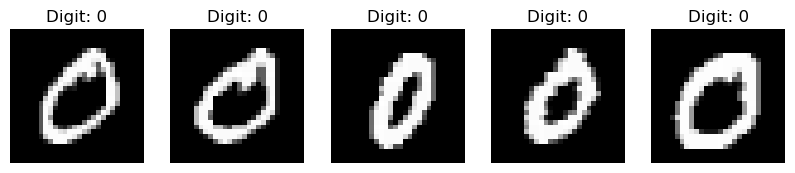

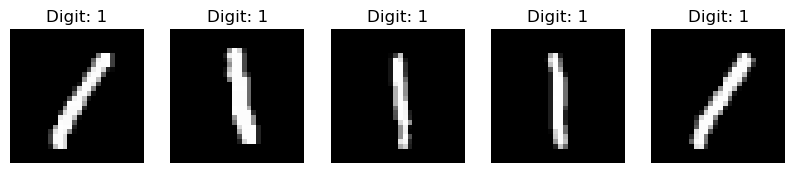

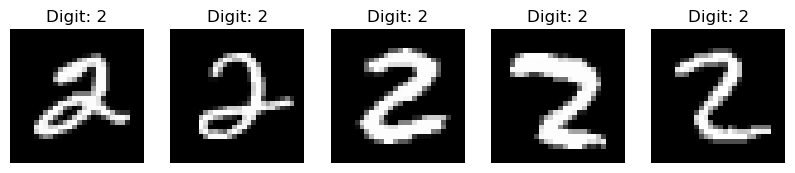

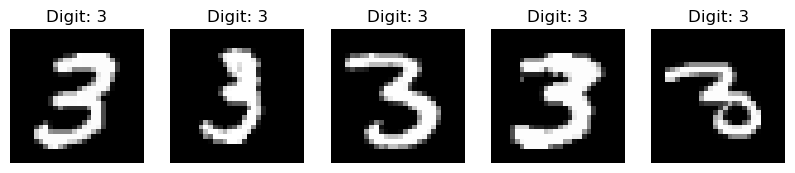

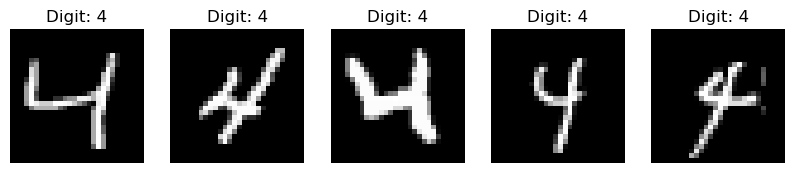

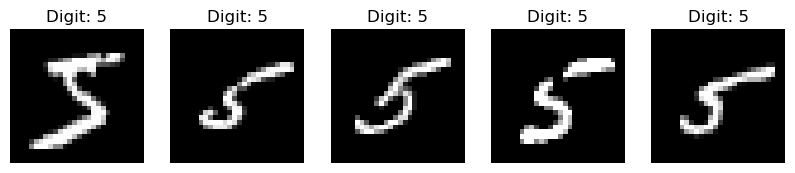

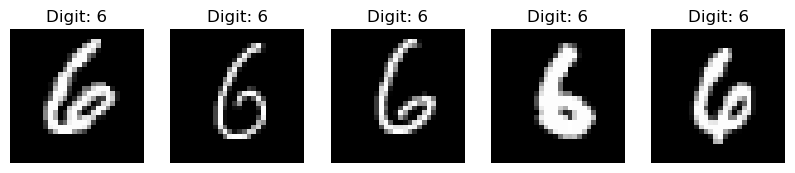

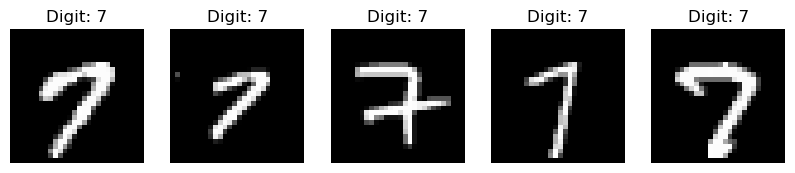

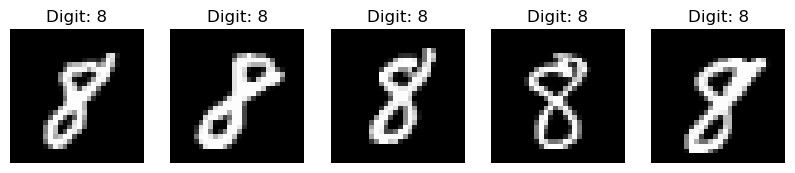

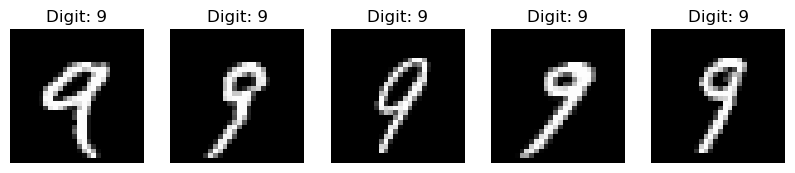

In [25]:

# Sample images of the dataset

import matplotlib.pyplot as plt

# Define the number of sample images to display for each digit
num_samples = 5

# Plot sample images for each digit
for digit in digit_images.keys():
    # Get sample images for the current digit
    sample_images = digit_images[digit][:num_samples]
    
    # Plot the sample images
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

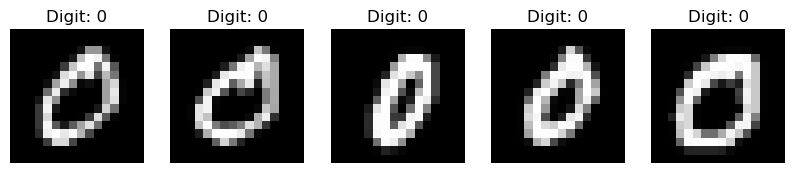

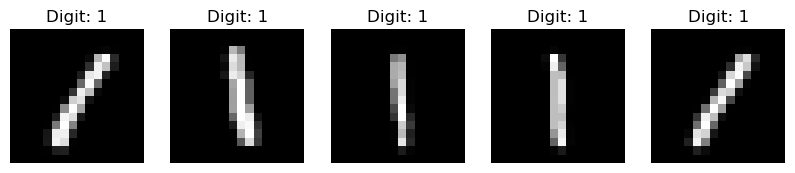

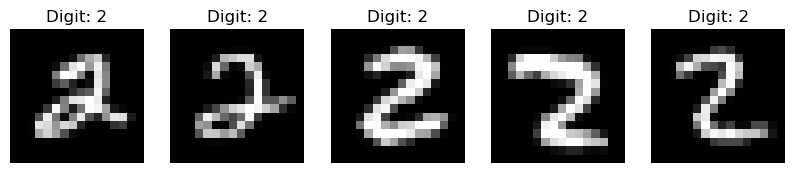

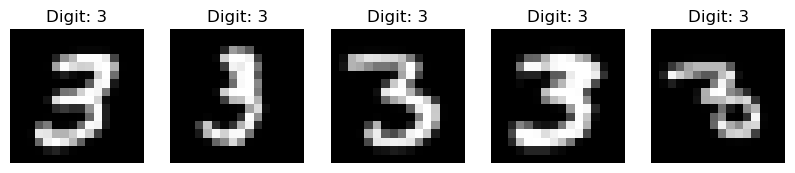

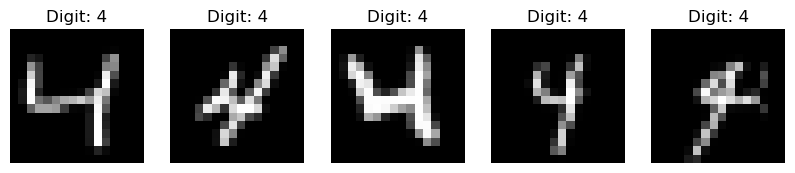

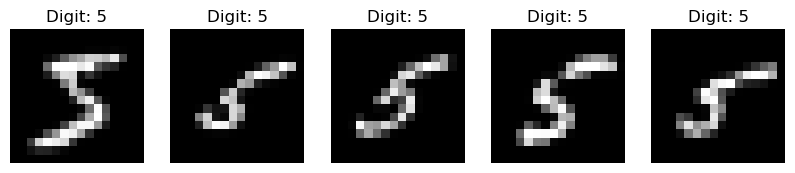

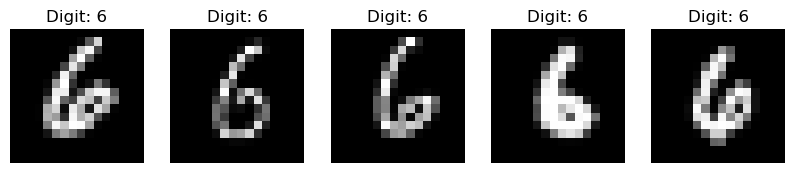

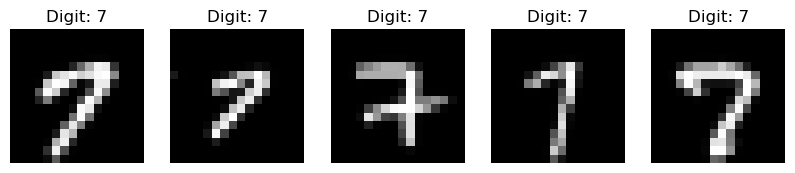

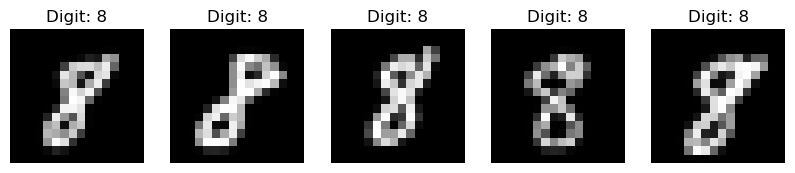

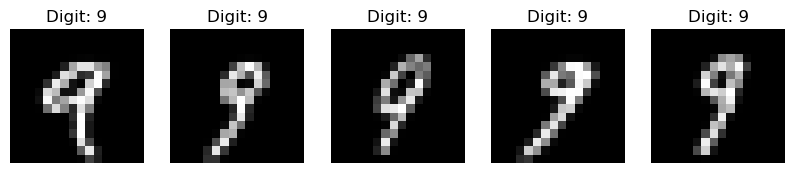

In [26]:
# Resizinfg the dataset for fitting it on the quantumpu ie qubit size

from skimage.transform import resize

def resize_images(images, new_size=(16,16)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28, 28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

# Define the new size for resizing
new_size = (16,16)

# Resize images for each digit
resized_digit_images = {}
for digit in digit_images.keys():
    resized_digit_images[digit] = resize_images(digit_images[digit], new_size=new_size)

# Plot sample resized images for each digit
for digit in digit_images.keys():
    # Get sample images for the current digit
    sample_images = resized_digit_images[digit][:num_samples]
    
    # Plot the sample images
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(new_size), cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()


In [27]:
# Number wise QNN circuit training starting with number zero

# for digit 0

# Normalize each array by dividing every element by its L2 norm
normalized_images_0 = []

for image in resized_digit_images[0]:
    normalized_image_0 = image / np.linalg.norm(image)
    normalized_images_0.append(normalized_image_0)

normalized_images_0 = np.array(normalized_images_0)

print("\nNormalized resized_digit_images:")
print(normalized_images_0)


Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# Digit 0 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data
from qiskit.quantum_info import Statevector

# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity


# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_0[0:500]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})
# Get the optimized parameters
optimized_params = result.x

In [7]:
# Quantum Average Trained Output state for Digit Zero

qc = quantum_circuit(result.x)
a_train_0 = get_output_state(qc)
print(a_train_0)
print(len(normalized_images_0))

[-0.01222409+8.72334168e-03j -0.00649013+6.03287409e-03j
 -0.00826554-6.10758903e-03j -0.00230044-1.28967184e-02j
 -0.01263766+7.05508199e-03j -0.01746292+1.46570701e-02j
 -0.01279991+8.52870394e-03j -0.01844337+1.18396131e-02j
  0.02082348-7.63029851e-03j  0.02814479-5.02996889e-03j
  0.00404252-5.18781205e-03j  0.01141609-6.09053720e-03j
 -0.00158346-4.09145617e-03j -0.00688934+3.93479072e-03j
 -0.00806318+2.32443491e-03j -0.01226602+7.33867468e-03j
 -0.00173098+5.38116560e-03j -0.00075232+7.77916148e-03j
 -0.01789869-5.59707740e-03j -0.01697424-1.82483280e-03j
  0.00377188-2.80333443e-03j  0.0053015 -2.63036249e-03j
  0.00274129+8.75361164e-03j  0.00312298+8.74587623e-03j
  0.01322639+1.00549470e-02j  0.00844229+8.31469919e-03j
 -0.00309236+1.66160500e-02j -0.0060814 +1.43402840e-02j
  0.00299851-3.10811599e-03j  0.0001668 -7.84752062e-03j
 -0.02083547+1.58262016e-02j -0.02266109+1.17526268e-02j
 -0.00998465-2.21300275e-03j -0.01075528+5.03528377e-03j
  0.00973851-4.80281751e-03j  0

In [30]:
# Testing of Quantum Circuit for New Image having Digit 0


initial_params = np.random.rand(186)

normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_0[4000:4001]]


result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})


optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_0 = get_output_state(qc)
print(b_test_0)
print(len(normalized_images_0))



[-0.03728223-5.98509107e-02j -0.01324488-4.92818461e-02j
 -0.00810892+1.28563307e-02j -0.00159458+4.29149067e-03j
  0.01074496-2.37976944e-02j  0.0032243 -2.86520258e-02j
 -0.0019274 -8.07732687e-03j  0.00209809+7.63720778e-04j
 -0.02332929+3.23816524e-02j -0.01073723+2.79189306e-02j
 -0.01706851+5.52255215e-03j -0.0005591 +2.19186780e-04j
 -0.00945701+1.95551410e-02j -0.0160628 +8.76169283e-03j
  0.00384524+1.61176128e-02j  0.00747646+9.56581448e-03j
  0.00932145+9.28755241e-03j  0.01696526+1.07638366e-02j
 -0.00263294-9.53578748e-04j -0.00673762+1.58986476e-02j
 -0.00300634-4.57711015e-03j  0.00648607-1.34418760e-03j
  0.01395148-8.12339534e-03j  0.00854781-2.61668006e-02j
 -0.008077  +2.74042274e-03j -0.00789572+9.98943598e-03j
  0.02561848+1.47955760e-02j  0.04512908+6.52302860e-03j
  0.01354696-4.78737813e-03j  0.03411193-1.50161733e-02j
 -0.00489941+1.10193511e-02j -0.00106556+2.07100005e-02j
 -0.01266806-2.63972582e-03j -0.01704276+1.75774499e-03j
  0.01408435+1.77716899e-02j  0

In [31]:
# Error Calculation between the Trained and the tested data for digit zero
# Define the error calculation function
def calculate_error(vector_a, vector_b):
    return np.sqrt(np.mean(np.abs(vector_a - vector_b) ** 2))

# Define the cosine similarity calculation function for complex vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Compute the error between b_test_0 and a_train_0
error_0 = calculate_error(b_test_0, a_train_0)

# Compute the cosine similarity between b_test_0 and a_train_0
cosine_similarity_0 = complex_cosine_similarity(b_test_0, a_train_0)

print("Error between b_test_0 and a_train_0:", error_0)
print("Cosine similarity between b_test_0 and a_train_0:", cosine_similarity_0)

Error between b_test_0 and a_train_0: 0.037632289488295695
Cosine similarity between b_test_0 and a_train_0: (0.8187277808472464-0.012881777297642453j)


In [10]:
# Digit 1

# Normalize each array by dividing every element by its L2 norm
normalized_images_1 = []

for image in resized_digit_images[1]:
    normalized_image_1 = image / np.linalg.norm(image)
    normalized_images_1.append(normalized_image_1)

normalized_images_1 = np.array(normalized_images_1)

print("\nNormalized resized_digit_images:")
print(normalized_images_1)


Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
# QNN Training circuit for Digit 1

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc

from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity


# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_1[0:6742]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})


# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0


# Get the optimized parameters
optimized_params = result.x

In [33]:
# for digit 1

qc = quantum_circuit(result.x)
c_train_1 = get_output_state(qc)
print(c_train_1)
print(len(normalized_images_1))

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_1[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
d_test_1 = get_output_state(qc)
print(d_test_1)
print(len(normalized_images_1))

# Error between the test and trained data for one digit

error = np.sqrt(np.mean(np.abs(d_test_1 - c_train_1) ** 2))

print(error)


[ 7.46894821e-03-8.29562688e-03j -1.22393959e-02-4.62617056e-03j
  1.61477155e-02-5.25326458e-03j  8.43006746e-03-8.22188288e-03j
 -1.19634235e-02-6.16284392e-03j -1.72672303e-02-5.24106838e-03j
 -8.86644509e-03+9.35629066e-03j -6.66820450e-03+3.76687973e-03j
  6.02817974e-03-1.36080046e-02j -9.71883025e-03-1.65105243e-02j
 -1.27377610e-02+1.11160725e-02j -3.41798386e-03+3.58719613e-03j
 -4.03942769e-03-9.78878827e-04j -7.20300563e-03-3.20878767e-03j
 -5.91341112e-03+2.12378917e-02j -6.18608082e-03+1.72873857e-02j
  1.03742855e-02-1.18455401e-02j  7.81636316e-03-8.63981177e-03j
  1.44846998e-02-9.34971692e-03j  8.19332435e-03-1.05632901e-02j
 -1.10121478e-02-7.40303825e-03j -9.13686735e-03-4.79481470e-03j
  7.57313444e-04-1.54195719e-02j  3.15231906e-03-2.22023185e-02j
  1.75480992e-02-1.72596688e-02j -2.71579769e-03-1.87644471e-02j
 -1.00662436e-02+2.16493101e-02j -5.89947801e-03+8.79319599e-03j
  6.48120303e-04-5.79264989e-04j -7.20630584e-03-3.62015298e-03j
  3.60595566e-03+1.242594

c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_lbfgsb_py.py:350: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_lbfgsb_py.py:350: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,


[-6.33507078e-04+1.69484831e-02j  1.09410938e-04+1.06071990e-03j
  1.17603772e-03+1.04425500e-03j -9.64395334e-05-3.23583573e-05j
 -3.75067920e-03-1.38581154e-02j -9.23290340e-04-1.38469103e-03j
 -7.11895785e-05+1.06778864e-03j -1.61830136e-04-1.91940652e-04j
 -5.21151686e-05+7.04622629e-03j  4.29187296e-03+3.72289473e-03j
 -5.07471442e-03+2.22256021e-03j -1.15195961e-03-8.91522585e-04j
  4.59521288e-03-5.04612750e-04j  9.83258976e-04-4.63085968e-04j
 -8.87638550e-04-8.67420928e-04j  3.92643540e-04-6.36306479e-04j
 -2.01414745e-04+7.93451740e-03j  6.87587389e-03+7.13238172e-04j
 -3.67506349e-03+1.04123104e-03j -2.57582449e-03+2.14890080e-04j
 -2.38663410e-03-1.61753238e-03j -9.05907267e-04-7.40511878e-05j
 -2.58741076e-03-2.46422521e-03j -4.27780404e-04-9.44389814e-04j
  1.64931244e-02+6.57481406e-04j  5.53532239e-03+9.04163004e-04j
  2.72650681e-03-8.95006579e-04j  5.51981949e-06-3.13195378e-04j
  8.72483160e-03+3.87550210e-03j  1.32449141e-03-2.07582236e-04j
 -6.69797064e-04+4.288971

In [35]:
# Error between the different digits 0 and 1

import numpy as np

# Define the error calculation function
def calculate_error(vector_a, vector_b):
    return np.sqrt(np.mean(np.abs(vector_a - vector_b) ** 2))

# Define the complex cosine similarity calculation function
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Compute the error between d_test_1 and c_train_1
error_d1_c1 = calculate_error(d_test_1, c_train_1)

# Compute the complex cosine similarity between d_test_1 and c_train_1
cosine_similarity_d1_c1 = complex_cosine_similarity(d_test_1, c_train_1)

print("Error between d_test_1 and c_train_1:", error_d1_c1)
print("Complex cosine similarity between d_test_1 and c_train_1:", cosine_similarity_d1_c1)

# Compute the error between a_train_0 and c_train_1
error_a0_c1 = calculate_error(a_train_0, c_train_1)

cosine_similarity_d0_c1 = complex_cosine_similarity(a_train_0, c_train_1)

print("Complex cosine similarity between d_test_1 and c_train_1:", cosine_similarity_d0_c1)
print("Error between a_train_0 and c_train_1:", error_a0_c1)


Error between d_test_1 and c_train_1: 0.053148185323800425
Complex cosine similarity between d_test_1 and c_train_1: (0.6384346107887321-0.006048365734218352j)
Complex cosine similarity between d_test_1 and c_train_1: (0.6322874853363879-0.006811559504056494j)
Error between a_train_0 and c_train_1: 0.053598078517886005


In [36]:
# QNN training for digit 2

# Normalize each array by dividing every element by its L2 norm
normalized_images_2 = []

for image in resized_digit_images[2]:
    normalized_image_2 = image / np.linalg.norm(image)
    normalized_images_2.append(normalized_image_2)

normalized_images_2 = np.array(normalized_images_2)

print("\nNormalized resized_digit_images:")
print(normalized_images_2)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc


from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity



# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_2[0:5958]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_2 = get_output_state(qc)
print(a_train_2)
print(len(normalized_images_2))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_2[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_2 = get_output_state(qc)
print(b_test_2)
print(len(normalized_images_2))



Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_lbfgsb_py.py:350: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,


[-9.29846384e-03-3.35828311e-03j -1.26660363e-02-2.95139396e-03j
 -9.44177159e-03+1.20879861e-03j -1.27069130e-02+1.89847373e-03j
  1.15820689e-02+3.72283334e-03j  7.92130631e-03-3.89402581e-04j
  1.08867960e-02+3.07328845e-03j  7.36253427e-03-1.60196814e-03j
 -1.30230072e-02+9.16974659e-03j -7.60666097e-03+1.10878141e-02j
 -2.01510121e-02+1.39067477e-02j -1.46922831e-02+1.49956807e-02j
  1.23759825e-03+1.51122316e-03j  4.15404424e-03+2.79068727e-03j
  5.65500460e-03+1.48702270e-03j  7.48252427e-03+1.67214520e-03j
  1.15409860e-02+1.64685110e-03j  9.35159356e-03-1.83639036e-04j
 -2.39354224e-03-1.39167588e-02j -3.65164320e-03-1.55768792e-02j
  1.53742190e-02+7.69108657e-03j  1.05022321e-02+5.78869459e-03j
  4.10603259e-03-7.10831099e-03j -5.43027063e-05-8.60084956e-03j
 -2.59993420e-03-4.22399536e-03j -2.62658430e-03-4.94939514e-03j
  5.19478740e-03+6.79001560e-03j  4.00511568e-03+6.91852218e-03j
 -7.88210479e-03-8.00980580e-03j -3.86612131e-04-5.14908294e-03j
  1.35640887e-02+1.134917

In [37]:
import numpy as np

# Define the error calculation function
def calculate_error(vector_a, vector_b):
    return np.sqrt(np.mean(np.abs(vector_a - vector_b) ** 2))

# Define the complex cosine similarity calculation function
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Calculate errors
error_2 = np.sqrt(np.mean(np.abs(b_test_2 - a_train_2) ** 2))
error_2_1 = np.sqrt(np.mean(np.abs(c_train_1 - a_train_2) ** 2))
error_2_0 = np.sqrt(np.mean(np.abs(a_train_0 - a_train_2) ** 2))

# Print errors
print("Error between b_test_2 and a_train_2:", error_2)
print("Error between c_train_1 and a_train_2:", error_2_1)
print("Error between a_train_0 and a_train_2:", error_2_0)

# Compute complex cosine similarity
cos_sim_2_1 = complex_cosine_similarity(c_train_1, a_train_2)
cos_sim_2_0 = complex_cosine_similarity(a_train_0, a_train_2)
cos_sim_2_2 = complex_cosine_similarity(b_test_2, a_train_2)

# Print complex cosine similarities
print("Complex cosine similarity between c_train_1 and a_train_2:", cos_sim_2_1)
print("Complex cosine similarity between a_train_0 and a_train_2:", cos_sim_2_0)
print("Complex cosine similarity between b_test_2 and a_train_2:", cos_sim_2_2)



Error between b_test_2 and a_train_2: 0.056623699551107236
Error between c_train_1 and a_train_2: 0.04781990790147072
Error between a_train_0 and a_train_2: 0.036199373813899226
Complex cosine similarity between c_train_1 and a_train_2: (0.7072968202617423+0.0060959253468062325j)
Complex cosine similarity between a_train_0 and a_train_2: (0.8322694829416436-0.010461334135698825j)
Complex cosine similarity between b_test_2 and a_train_2: (0.5896008510906805+0.004916660084288235j)


In [38]:
# QNN training for digit 3

# Normalize each array by dividing every element by its L2 norm
normalized_images_3 = []

for image in resized_digit_images[3]:
    normalized_image_3 = image / np.linalg.norm(image)
    normalized_images_3.append(normalized_image_3)

normalized_images_3 = np.array(normalized_images_3)

print("\nNormalized resized_digit_images:")
print(normalized_images_3)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc

from qiskit.quantum_info import Statevector

from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity




# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_3[0:6131]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_3 = get_output_state(qc)
print(a_train_3)
print(len(normalized_images_3))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_3[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_3 = get_output_state(qc)
print(b_test_3)
print(len(normalized_images_3))




Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_lbfgsb_py.py:350: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,


[ 7.84515999e-03+2.51950938e-03j  6.36387773e-03-2.16783374e-03j
 -5.38363350e-03+3.33774855e-03j -3.85947889e-03+5.99229886e-03j
  1.97465049e-03+1.77219879e-02j  4.00503812e-03+1.55168208e-02j
 -4.60224811e-03+4.73696949e-03j -5.24449874e-03+3.85811335e-03j
  1.09248102e-02-1.59491244e-03j  7.99873189e-03+1.83947672e-03j
 -3.49332244e-03+3.48248127e-03j -5.73591335e-03+5.47783963e-03j
  1.00952031e-02-6.05515172e-03j  8.28677477e-03+1.60899956e-03j
  7.15538157e-03+3.03723248e-03j -8.49458310e-04+1.23511467e-02j
 -1.21988063e-02+2.29761886e-03j -1.00774671e-02+6.46323949e-03j
 -1.91965202e-02+5.45903122e-03j -2.02866647e-02+8.92197087e-03j
  1.98669557e-03+1.53604703e-02j -8.24271188e-04+1.15686943e-02j
 -9.81439735e-03-2.76410440e-03j -1.38886191e-02-5.40555664e-03j
 -1.22478981e-02-8.74967543e-03j -6.74019430e-03-1.00542552e-02j
 -2.85039598e-03+1.48318809e-02j -2.45370577e-03+1.81255499e-02j
  1.47504354e-02-4.83205727e-03j  9.59869583e-03-1.02786677e-02j
 -2.93067169e-03-5.279279

In [41]:
# QNN training for digit 4

# Normalize each array by dividing every element by its L2 norm
normalized_images_4 = []

for image in resized_digit_images[4]:
    normalized_image_4 = image / np.linalg.norm(image)
    normalized_images_4.append(normalized_image_4)

normalized_images_4 = np.array(normalized_images_4)

print("\nNormalized resized_digit_images:")
print(normalized_images_4)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc

from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity



# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_4[0:5842]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_4 = get_output_state(qc)
print(a_train_4)
print(len(normalized_images_4))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_4[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_4 = get_output_state(qc)
print(b_test_4)
print(len(normalized_images_4))




Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\optimize\_lbfgsb_py.py:350: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,


[-7.82806001e-03+2.10435458e-03j -6.13636412e-03-1.07424633e-03j
 -4.55143060e-03+2.46424542e-03j -7.64005396e-04+6.91476749e-04j
 -1.45057021e-02+6.23705521e-03j -1.26971615e-02+3.55638578e-03j
  9.89383670e-03+1.00822325e-02j  1.59587209e-02+9.10913800e-03j
 -1.27068952e-03-9.12117232e-03j -2.23617206e-03-1.37879121e-02j
 -3.94531097e-03+2.15263376e-03j -3.05372259e-03+1.91976857e-03j
 -2.73053723e-03-2.86928538e-03j -9.52297037e-04+6.68225572e-03j
 -3.63733062e-03+3.67139270e-04j -6.23780828e-03+4.31451940e-03j
 -7.23726024e-03+2.83145296e-04j -5.04350783e-03-1.36802788e-03j
 -8.45593906e-04+5.08990462e-03j  3.72675535e-03+4.23663519e-03j
 -9.92422719e-03-2.68466800e-03j -7.69797858e-03-4.48224032e-03j
  1.54481489e-02+4.72640179e-03j  2.32057985e-02+5.56657832e-03j
  1.09863716e-02-7.42070565e-03j  9.79108385e-03-1.33353550e-02j
 -5.89769794e-04+1.39526669e-03j -2.05534066e-04-8.25006941e-04j
  9.10044821e-04-4.44660052e-03j  1.34142706e-04+4.36604583e-03j
 -2.43487428e-03-2.728967

[4, 0, 1, 0, 0, 1, 4, 1, 6, 0, 0, 0, 9, 0, 1, 0, 9, 6, 5, 4, 1, 9, 6, 6, 9, 0, 3, 4, 0, 4, 1, 9, 7, 0, 4, 6, 0, 8, 0, 1, 1, 0, 4, 4, 4, 0, 4, 6, 9, 0, 0, 3, 5, 0, 0, 2, 0, 1, 9, 3, 3, 5, 9, 6, 4, 9, 6, 4, 7, 0, 5, 0, 0, 1, 8, 8, 3, 4, 1, 0, 7, 6, 6, 9, 0, 0, 9, 7, 6, 1, 1, 2, 4, 3, 9, 9, 4, 1, 2, 7]


In [42]:
#QNN training for digit 5

# Normalize each array by dividing every element by its L2 norm
normalized_images_5 = []

for image in resized_digit_images[5]:
    normalized_image_5 = image / np.linalg.norm(image)
    normalized_images_5.append(normalized_image_5)

normalized_images_5 = np.array(normalized_images_5)

print("\nNormalized resized_digit_images:")
print(normalized_images_5)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc

from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity


def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    
    return -total_similarity



# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_5[0:5421]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_5 = get_output_state(qc)
print(a_train_5)
print(len(normalized_images_5))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_5[4000:4500]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_5 = get_output_state(qc)
print(b_test_5)
print(len(normalized_images_5))




Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-3.87168979e-03-1.58314368e-03j -5.38345619e-03-4.25248561e-04j
  8.01044195e-03-2.41451788e-03j  6.70742229e-03-1.71640265e-04j
  4.36833443e-03+3.46507035e-03j  2.33027408e-04+4.79704259e-04j
 -4.77140534e-03+1.03964794e-05j -9.88655827e-03-3.53528340e-03j
 -5.33300758e-04-8.93486449e-03j  6.51959735e-04-1.14953285e-02j
 -6.91522778e-03+2.37503437e-03j -4.51120474e-03-1.77323259e-04j
  5.52169534e-03-3.64091691e-03j  6.76543009e-03-8.10093699e-03j
  5.41454516e-03-2.97163137e-03j  6.02579274e-03-7.46274659e-03j
 -5.40818740e-03-7.08052599e-03j -2.74436135e-03-4.21021033e-03j
  2.51280707e-03+5.60154782e-03j  4.95976789e-03+9.52614818e-03j
  6.18764114e-03+4.75942922e-03j -2.57356734e-05+6.90430481e-03j
  5.17606847e-03+7.11841961e-03j  2.00080151e-05+9.88663793e-03j
  1.28039664e-02-7.36000339e-0

In [43]:
#QNN training for digit 6

# Normalize each array by dividing every element by its L2 norm
normalized_images_6 = []

for image in resized_digit_images[6]:
    normalized_image_6 = image / np.linalg.norm(image)
    normalized_images_6.append(normalized_image_6)

normalized_images_6 = np.array(normalized_images_6)

print("\nNormalized resized_digit_images:")
print(normalized_images_6)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc
from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity





# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_6[0:5918]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_6 = get_output_state(qc)
print(a_train_6)
print(len(normalized_images_6))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_6[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_6 = get_output_state(qc)
print(b_test_6)
print(len(normalized_images_6))




Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-1.31127911e-03+7.15670711e-04j -2.94039897e-03-1.29652037e-04j
 -7.33085667e-03+1.15458060e-03j -2.98810080e-03+2.56422042e-03j
 -5.61216359e-03+1.94529331e-03j -9.46582496e-03+2.39795937e-03j
  4.03971026e-03+8.91111970e-03j  4.30923064e-03+7.44903541e-03j
 -3.10640196e-04-1.62192857e-03j  7.01308867e-04+1.61628294e-03j
  8.55197682e-03-3.98791782e-03j  1.91093427e-02-3.70310833e-03j
 -3.14628324e-03+1.68558645e-03j  3.83766740e-04-2.25196807e-03j
  8.85240972e-03+1.82620453e-03j  7.66052401e-03+2.58192651e-03j
  1.59688192e-03+4.63541314e-03j  6.76023570e-03+4.82279813e-03j
 -1.90627567e-03-1.34947917e-02j -4.45499933e-03-8.89240202e-03j
  2.75864270e-02-1.21662266e-02j  3.09525057e-02-1.28218546e-02j
  7.89955659e-03+1.15029196e-02j  1.50182886e-02+8.09796575e-03j
  2.05908837e-02-1.06859712e-0

In [44]:
#QNN training for digit 7

# Normalize each array by dividing every element by its L2 norm
normalized_images_7 = []

for image in resized_digit_images[7]:
    normalized_image_7 = image / np.linalg.norm(image)
    normalized_images_7.append(normalized_image_7)

normalized_images_7 = np.array(normalized_images_7)

print("\nNormalized resized_digit_images:")
print(normalized_images_7)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc
from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity



# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_7[0:6265]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_7 = get_output_state(qc)
print(a_train_7)
print(len(normalized_images_7))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_7[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_7 = get_output_state(qc)
print(b_test_7)
print(len(normalized_images_7))






Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-7.45274223e-03+2.35186780e-03j -1.23091628e-02+2.61856266e-03j
 -8.31455295e-03-2.56224842e-04j -1.25079811e-02+2.08699561e-03j
 -8.59179290e-03-1.22900097e-02j -3.68676382e-03+4.26402700e-04j
  3.03855271e-03-9.30809662e-03j  3.17219244e-03+1.97670630e-03j
  1.16195108e-02+9.09748677e-04j  5.22898837e-03-1.20617220e-03j
  1.10668187e-02-1.08739065e-02j  1.01151573e-03-6.81192642e-03j
  6.11530435e-03+7.00722843e-04j  9.33260784e-03+1.92863587e-04j
 -3.28919304e-04+2.95455833e-03j  2.84583420e-03+4.15078353e-03j
 -7.93609621e-03+6.32156598e-03j -4.84915355e-03+3.34917330e-03j
 -6.73287850e-03+1.36422344e-02j -4.53383161e-03+1.14719181e-02j
 -2.18417944e-03+6.54541168e-03j -9.99239140e-03+3.29704017e-03j
  1.12839529e-02+1.72214678e-02j  6.80721502e-03+1.67037661e-02j
  1.06987689e-03+1.48343893e-0

ValueError: This function does not support complex data

In [45]:
# for digit 8

# Normalize each array by dividing every element by its L2 norm
normalized_images_8 = []

for image in resized_digit_images[8]:
    normalized_image_8 = image / np.linalg.norm(image)
    normalized_images_8.append(normalized_image_8)

normalized_images_8 = np.array(normalized_images_8)

print("\nNormalized resized_digit_images:")
print(normalized_images_8)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)
    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc

from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity




# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_8[0:5851]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_8 = get_output_state(qc)
print(a_train_8)
print(len(normalized_images_8))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_8[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_8 = get_output_state(qc)
print(b_test_8)
print(len(normalized_images_8))





Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-7.57577308e-03+5.04436313e-03j -5.21155687e-03+4.92371403e-03j
 -9.24678145e-03+9.48453396e-04j -1.02621038e-02+2.80796724e-03j
  1.97476308e-02+4.32763117e-03j  1.39510128e-02+3.80167992e-03j
 -1.26987910e-02+1.47638434e-02j -1.03260509e-02+1.27570927e-02j
 -3.69632884e-03-3.11350580e-04j -3.48817271e-03+8.07758461e-04j
 -2.09245690e-03-1.57563294e-02j -1.09155983e-03-1.38097950e-02j
 -4.17265643e-03+8.14430016e-03j -7.97823506e-03+1.01562732e-02j
  6.88788111e-03-3.39488193e-03j  4.64849742e-03-5.95268529e-03j
 -1.53009371e-02-6.46562414e-03j -1.80009660e-02-5.23506398e-03j
 -1.56192098e-02+2.08466239e-03j -1.48380956e-02-1.73750513e-03j
  1.68237202e-02+2.05634892e-03j  1.34932596e-02+7.87400175e-03j
 -3.49551746e-04+8.18981465e-03j -3.47860576e-03+8.34024558e-03j
 -2.92216658e-04+1.38598794e-0

[4, 0, 1, 0, 0, 1, 4, 1, 6, 0, 0, 0, 9, 0, 1, 0, 9, 6, 5, 4, 1, 9, 6, 6, 9, 0, 3, 4, 0, 4, 1, 9, 7, 0, 4, 6, 0, 8, 0, 1, 1, 0, 4, 4, 4, 0, 4, 6, 9, 0, 0, 3, 5, 0, 0, 2, 0, 1, 9, 3, 3, 5, 9, 6, 4, 9, 6, 4, 7, 0, 5, 0, 0, 1, 8, 8, 3, 4, 1, 0, 7, 6, 6, 9, 0, 0, 9, 7, 6, 1, 1, 2, 4, 3, 9, 9, 4, 1, 2, 7]


In [46]:
# for digit 9

# Normalize each array by dividing every element by its L2 norm
normalized_images_9 = []

for image in resized_digit_images[9]:
    normalized_image_9 = image / np.linalg.norm(image)
    normalized_images_9.append(normalized_image_9)

normalized_images_9 = np.array(normalized_images_9)

print("\nNormalized resized_digit_images:")
print(normalized_images_9)

# Digit 2 training of quantum Angles

import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, execute

# Define the quantum circuit
def quantum_circuit(params):
    # Initialize the quantum circuit with 8 qubits
    qc = QuantumCircuit(8)

    for i in range(8):
        qc.h(i)
    
    theta_0, phi_0, psi_0 = params[0:3]  # Extract parameters for the i-th qubit
    qc.u(theta_0, phi_0, psi_0, 0)  # Apply the single-qubit gate to the i-th qubit
    # Apply CNOT gates between adjacent qubits
    qc.cx(0, 1)
    theta_1, phi_1, psi_1 = params[3:6]
    qc.u(theta_1, phi_1, psi_1, 1)   
    qc.cx(1, 2)
    theta_2, phi_2, psi_2 = params[6:9]  
    qc.u(theta_2, phi_2, psi_2, 2) 
    qc.cx(2, 3)
    theta_3, phi_3, psi_3 = params[9:12]  
    qc.u(theta_3, phi_3, psi_3, 3)
    qc.cx(3, 4)
    theta_4, phi_4, psi_4 = params[12:15]
    qc.u(theta_4, phi_4, psi_4, 4)
    qc.cx(4, 5)
    theta_5, phi_5, psi_5 = params[15:18]
    qc.u(theta_5, phi_5, psi_5, 5)
    qc.cx(5, 6)
    theta_6, phi_6, psi_6 = params[18:21]
    qc.u(theta_6, phi_6, psi_6, 6)
    qc.cx(6, 7)
    theta_7, phi_7, psi_7 = params[21:24]
    qc.u(theta_7, phi_7, psi_7, 7)
    qc.cx(7, 6)
    theta_8, phi_8, psi_8 = params[24:27]
    qc.u(theta_8, phi_8, psi_8, 6)
    qc.cx(6, 5)
    theta_9, phi_9, psi_9 = params[27:30]
    qc.u(theta_9, phi_9, psi_9, 5)
    qc.cx(5, 4)
    theta_10, phi_10, psi_10 = params[30:33]
    qc.u(theta_10, phi_10, psi_10, 4)
    qc.cx(4, 3)
    theta_11, phi_11, psi_11 = params[33:36]
    qc.u(theta_11, phi_11, psi_11, 3)
    qc.cx(3, 2)
    theta_12, phi_12, psi_12 = params[36:39]
    qc.u(theta_12, phi_12, psi_12, 2)
    qc.cx(2, 1)
    theta_13, phi_13, psi_13 = params[39:42]
    qc.u(theta_13, phi_13, psi_13, 1)
    qc.cx(1, 0)
    theta_14, phi_14, psi_14 = params[42:45]
    qc.u(theta_14, phi_14, psi_14, 0)
    qc.cx(0,7)
    theta_15, phi_15, psi_15 = params[45:48]
    qc.u(theta_15, phi_15, psi_15, 7)
    qc.cx(7,0)
    theta_16, phi_16, psi_16 = params[48:51]
    qc.u(theta_16, phi_16, psi_16, 0)
    qc.cx(0,6)
    theta_17, phi_17, psi_17 = params[51:54]
    qc.u(theta_17, phi_17, psi_17, 6)
    qc.cx(6,0)
    theta_18, phi_18, psi_18 = params[54:57]
    qc.u(theta_18, phi_18, psi_18, 0)
    qc.cx(0,5)
    theta_19, phi_19, psi_19 = params[57:60]
    qc.u(theta_19, phi_19, psi_19, 5)
    qc.cx(5,0)
    theta_20, phi_20, psi_20 = params[60:63]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,4)
    theta_20, phi_20, psi_20 = params[63:66]
    qc.u(theta_20, phi_20, psi_20, 4)
    qc.cx(4,0)
    theta_20, phi_20, psi_20 = params[66:69]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,3)
    theta_20, phi_20, psi_20 = params[69:72]
    qc.u(theta_20, phi_20, psi_20, 3)
    qc.cx(3,0)
    theta_20, phi_20, psi_20 = params[72:75]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,2)
    theta_20, phi_20, psi_20 = params[75:78]
    qc.u(theta_20, phi_20, psi_20, 2)
    qc.cx(2,0)
    theta_20, phi_20, psi_20 = params[78:81]
    qc.u(theta_20, phi_20, psi_20, 0)
    qc.cx(0,1)
    theta_21, phi_21, psi_21 = params[81:84]
    qc.u(theta_21, phi_21, psi_21, 1)
    qc.cx(1,7)
    theta_22, phi_22, psi_22 = params[84:87]
    qc.u(theta_22, phi_22, psi_22, 0)
    qc.cx(7,1)
    theta_23, phi_23, psi_23 = params[87:90]
    qc.u(theta_23, phi_23, psi_23, 1)
    qc.cx(1,6)
    theta_24, phi_24, psi_24 = params[90:93]
    qc.u(theta_24, phi_24, psi_24, 0)
    qc.cx(6,1)
    theta_25, phi_25, psi_25 = params[93:96]
    qc.u(theta_25, phi_25, psi_25, 1)
    qc.cx(1,5)
    theta_26, phi_26, psi_26 = params[96:99]
    qc.u(theta_26, phi_26, psi_26, 5)
    qc.cx(5,1)
    theta_27, phi_27, psi_27 = params[99:102]
    qc.u(theta_27, phi_27, psi_27, 1)
    qc.cx(1,4)
    theta_28, phi_28, psi_28 = params[102:105]
    qc.u(theta_28, phi_28, psi_28, 4)
    qc.cx(4,1)
    theta_29, phi_29, psi_29 = params[105:108]
    qc.u(theta_29, phi_29, psi_29, 1)
    qc.cx(1,3)
    theta_30, phi_30, psi_30 = params[108:111]
    qc.u(theta_30, phi_30, psi_30, 3)
    qc.cx(3,1)
    theta_31, phi_31, psi_31 = params[111:114]
    qc.u(theta_31, phi_31, psi_31, 1)
    qc.cx(1,2)
    theta_32, phi_32, psi_32 = params[114:117]
    qc.u(theta_32, phi_32, psi_32, 2)
    qc.cx(2,7)
    theta_33, phi_33, psi_33 = params[117:120]
    qc.u(theta_33, phi_33, psi_33, 7)
    qc.cx(7,2)
    theta_34, phi_34, psi_34 = params[120:123]
    qc.u(theta_34, phi_34, psi_34, 2)
    qc.cx(2,6)
    theta_35, phi_35, psi_35 = params[123:126]
    qc.u(theta_35, phi_35, psi_35, 6)
    qc.cx(6,2)
    theta_36, phi_36, psi_36 = params[126:129]
    qc.u(theta_36, phi_36, psi_36, 2)
    qc.cx(2,5)
    theta_37, phi_37, psi_37 = params[129:132]
    qc.u(theta_37, phi_37, psi_37, 5)
    qc.cx(5,2)
    theta_38, phi_38, psi_38 = params[132:135]
    qc.u(theta_38, phi_38, psi_38, 2)
    qc.cx(2,4)
    theta_39, phi_39, psi_39 = params[135:138]
    qc.u(theta_39, phi_39, psi_39, 4)
    qc.cx(4,2)
    theta_40, phi_40, psi_40 = params[138:141]
    qc.u(theta_40, phi_40, psi_40, 2)
    qc.cx(2,3)
    theta_41, phi_41, psi_41 = params[141:144]
    qc.u(theta_41, phi_41, psi_41, 3)
    qc.cx(3,7)
    theta_42, phi_42, psi_42 = params[144:147]
    qc.u(theta_42, phi_42, psi_42, 7)
    qc.cx(7,3)
    theta_43, phi_43, psi_43 = params[147:150]
    qc.u(theta_43, phi_43, psi_43, 3)
    qc.cx(3,6)
    theta_44, phi_44, psi_44 = params[150:153]
    qc.u(theta_44, phi_44, psi_44, 6)
    qc.cx(6,3)
    theta_45, phi_45, psi_45 = params[153:156]
    qc.u(theta_45, phi_45, psi_45, 3)
    qc.cx(3,5)
    theta_45, phi_45, psi_45 = params[156:159]
    qc.u(theta_45, phi_45, psi_45, 5)
    qc.cx(5,3)
    theta_46, phi_46, psi_46 = params[159:162]
    qc.u(theta_46, phi_46, psi_46, 3)
    qc.cx(3,4)
    theta_47, phi_47, psi_47 = params[162:165]
    qc.u(theta_47, phi_47, psi_47, 4)
    qc.cx(4,7)
    theta_48, phi_48, psi_48 = params[165:168]
    qc.u(theta_48, phi_48, psi_48, 7)
    qc.cx(7,4)
    theta_49, phi_49, psi_49 = params[168:171]
    qc.u(theta_49, phi_49, psi_49, 4)
    qc.cx(4,6)
    theta_50, phi_50, psi_50 = params[171:174]
    qc.u(theta_50, phi_50, psi_50, 6)
    qc.cx(6,4)
    theta_51, phi_51, psi_51 = params[174:177]
    qc.u(theta_51, phi_51, psi_51, 4)
    qc.cx(4,5)
    theta_52, phi_52, psi_52 = params[177:180]
    qc.u(theta_52, phi_52, psi_52, 5)
    qc.cx(5,7)
    theta_53, phi_53, psi_53 = params[180:183]
    qc.u(theta_53, phi_53, psi_53, 7)
    qc.cx(7,5)
    theta_54, phi_54, psi_54 = params[183:186]
    qc.u(theta_54, phi_54, psi_54, 5)


    for i in range(8):
        qc.h(i)

    return qc

from qiskit.quantum_info import Statevector

def get_output_state(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    output_state = result.get_statevector(qc)
    return output_state.data

# Define the cost function only for label 0 with 10 samples
# Function to compute the cosine similarity between two vectors
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Cost function to minimize the sum of cosine similarities
def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    total_similarity = 0
    for target_state in target_states:
        similarity = complex_cosine_similarity(target_state, output_state)
        total_similarity += similarity
    # Since minimize function minimizes the function value, take the negative of total similarity
    return -total_similarity



# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label 0
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_9[0:5949]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

# Quantum Average Trained Output state for Digit Two

qc = quantum_circuit(result.x)
a_train_9 = get_output_state(qc)
print(a_train_9)
print(len(normalized_images_9))

# Testing of Quantum Circuit for New Image having Digit Two

# Initialize parameters randomly
initial_params = np.random.rand(186)

# Select only the first 10 normalized complex vectors for label Two
normalized_complex_digit_vectors_label_0_10_samples = [image.astype(np.complex128) for image in normalized_images_9[4000:4001]]


# Optimize the parameters using COBYLA optimization
result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})

# Get the optimized parameters
optimized_params = result.x

qc = quantum_circuit(result.x)
b_test_9 = get_output_state(qc)
print(b_test_9)
print(len(normalized_images_9))




Normalized resized_digit_images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 9.09597769e-03-1.59213388e-03j  9.16882189e-03-8.80288224e-05j
  4.65016805e-03+4.86421231e-03j  4.28943199e-03+6.25291050e-03j
  9.46058864e-03+4.44434387e-03j  1.12615885e-02+4.78486386e-03j
  6.30006668e-03+9.72483658e-03j  7.37536115e-03+1.06998795e-02j
 -2.71449973e-03-2.26970529e-03j -9.49850065e-04-3.20873919e-03j
 -4.00531052e-03+7.65415703e-03j -2.05219026e-03+5.69996526e-03j
 -6.64326379e-03+9.03487874e-03j  6.17710334e-04+9.63187663e-03j
 -3.40236639e-03+6.15091532e-03j  3.53993490e-03+6.64215027e-03j
  9.76364228e-04-4.08540363e-03j -2.83130390e-03-6.42064516e-03j
  8.78522001e-03+4.68740586e-03j  4.61525909e-03+2.15942650e-03j
 -4.36203523e-03+1.13843748e-03j -6.03788246e-03-2.79100523e-04j
  2.11730085e-03+1.24812542e-02j -5.98623471e-07+1.09121448e-02j
 -6.46752850e-03-4.09325807e-0

In [47]:
print(a_train_0)
print(c_train_1)
print(a_train_2)
print(a_train_3)
print(a_train_4)
print(a_train_5)
print(a_train_6)
print(a_train_7)
print(a_train_8)
print(a_train_9)

[-0.01222409+8.72334168e-03j -0.00649013+6.03287409e-03j
 -0.00826554-6.10758903e-03j -0.00230044-1.28967184e-02j
 -0.01263766+7.05508199e-03j -0.01746292+1.46570701e-02j
 -0.01279991+8.52870394e-03j -0.01844337+1.18396131e-02j
  0.02082348-7.63029851e-03j  0.02814479-5.02996889e-03j
  0.00404252-5.18781205e-03j  0.01141609-6.09053720e-03j
 -0.00158346-4.09145617e-03j -0.00688934+3.93479072e-03j
 -0.00806318+2.32443491e-03j -0.01226602+7.33867468e-03j
 -0.00173098+5.38116560e-03j -0.00075232+7.77916148e-03j
 -0.01789869-5.59707740e-03j -0.01697424-1.82483280e-03j
  0.00377188-2.80333443e-03j  0.0053015 -2.63036249e-03j
  0.00274129+8.75361164e-03j  0.00312298+8.74587623e-03j
  0.01322639+1.00549470e-02j  0.00844229+8.31469919e-03j
 -0.00309236+1.66160500e-02j -0.0060814 +1.43402840e-02j
  0.00299851-3.10811599e-03j  0.0001668 -7.84752062e-03j
 -0.02083547+1.58262016e-02j -0.02266109+1.17526268e-02j
 -0.00998465-2.21300275e-03j -0.01075528+5.03528377e-03j
  0.00973851-4.80281751e-03j  0

In [48]:
from PIL import Image
# Load MNIST test dataset
images = idx2numpy.convert_from_file(r'C:\Users\Akshay Patil\Downloads\archive\t10k-images.idx3-ubyte')
labels = idx2numpy.convert_from_file(r'C:\Users\Akshay Patil\Downloads\archive\t10k-labels.idx1-ubyte')


# Resize images to 16x16
images_resized = np.array([np.array(Image.fromarray(img).resize((16, 16))) for img in images])

# Flatten the matrix
images_flattened = images_resized.reshape(len(images), -1)

# Normalize vectors
normalized_images = images_flattened / np.linalg.norm(images_flattened, axis=1)[:, np.newaxis]


In [54]:

initial_params = np.random.rand(186)

normalized_complex_digit_vectors_label_0_10 = [image.astype(np.complex128) for image in normalized_images]

a_train_test = []

def cost_function(params):
    qc = quantum_circuit(params)
    output_state = get_output_state(qc)
    target_states = normalized_complex_digit_vectors_label_0_10_samples  # Replace this with your list of 6000 arrays
    similarity = complex_cosine_similarity(target_states, output_state)

    return -similarity

for i in range(100):

    normalized_complex_digit_vectors_label_0_10_samples = normalized_complex_digit_vectors_label_0_10[i]
    initial_params = np.random.rand(186)

    result = minimize(cost_function, initial_params, method='L-BFGS-B', options={'maxiter': 500000})


    optimized_params = result.x

    # Quantum Average Trained Output state
    qc = quantum_circuit(optimized_params)
    a_train_new = get_output_state(qc)
    a_train_test.append(a_train_new)

label = []
import numpy as np

# Assuming the vectors are defined somewhere

# Define lists to store error metrics
mae_list = []
rmse_list = []
frobenius_norm_list = []

# Iterate through each test data point
for i in a_train_test:
    # Compute errors for each digit
    errors = [
        np.sqrt(np.mean(np.abs(i - a_train_0) ** 2)),
        np.sqrt(np.mean(np.abs(i - c_train_1) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_2) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_3) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_4) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_5) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_6) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_7) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_8) ** 2)),
        np.sqrt(np.mean(np.abs(i - a_train_9) ** 2))
    ]
    
    # Calculate error metrics
    mae = np.mean(errors)
    rmse = np.sqrt(np.mean(np.array(errors) ** 2))
    frobenius_norm = np.linalg.norm(errors)
    
    # Append error metrics to lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    frobenius_norm_list.append(frobenius_norm)

    min_error_index = np.argmin(errors)

    if min_error_index == 0:
        label.append(0)
    elif min_error_index == 1:
        label.append(1)
    elif min_error_index == 2:
        label.append(2)
    elif min_error_index == 3:
        label.append(3)
    elif min_error_index == 4:
        label.append(4)
    elif min_error_index == 5:
        label.append(5)
    elif min_error_index == 6:
        label.append(6)
    elif min_error_index == 7:
        label.append(7)
    elif min_error_index == 8:
        label.append(8)
    elif min_error_index == 9:
        label.append(9)

# Print error metrics
print("Average MAE:", np.mean(mae_list))
print("Average RMSE:", np.mean(rmse_list))
print("Average Frobenius Norm:", np.mean(frobenius_norm_list))

Average MAE: 0.05421295403512351
Average RMSE: 0.054570760770411786
Average Frobenius Norm: 0.1725678976826662


In [55]:
print(label)

[7, 2, 1, 0, 4, 1, 9, 9, 2, 9]


In [56]:
print(labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [57]:
count = 0
for labe, true_label in zip(label, labels):
    if labe == true_label:
        count += 1

print("Number of times elements are same:", count)

Number of times elements are same: 8


In [58]:
# Define the complex cosine similarity calculation function
def complex_cosine_similarity(a, b):
    dot_product = np.vdot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

# Initialize lists to store labels and error metrics
label = []
mae_list = []
rmse_list = []
frobenius_norm_list = []

# Iterate through each test data point
for i in a_train_test:
    # Calculate errors for each reference vector
    errors = []
    for reference_vector in [a_train_0, c_train_1, a_train_2, a_train_3, a_train_4, a_train_5, a_train_6, a_train_7, a_train_8, a_train_9]:
        error = calculate_error(i, reference_vector)
        errors.append(error)
    
    # Compute error metrics
    mae = np.mean(errors)
    rmse = np.sqrt(np.mean(np.array(errors) ** 2))
    frobenius_norm = np.linalg.norm(errors)
    
    # Append error metrics to lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    frobenius_norm_list.append(frobenius_norm)

    # Find the index of the minimum error
    min_error_index = np.argmin(errors)
    label.append(min_error_index)  # Append the predicted label

# Compute complex cosine similarity
cosine_similarities = []
for i, reference_vector in enumerate([a_train_0, c_train_1, a_train_2, a_train_3, a_train_4, a_train_5, a_train_6, a_train_7, a_train_8, a_train_9]):
    cos_sim = [complex_cosine_similarity(a_train_test[j], reference_vector) for j in range(len(a_train_test))]
    cosine_similarities.append(cos_sim)

# Print average error metrics
print("Average MAE:", np.mean(mae_list))
print("Average RMSE:", np.mean(rmse_list))
print("Average Frobenius Norm:", np.mean(frobenius_norm_list))

# Print complex cosine similarities
for i, cos_sim in enumerate(cosine_similarities):
    print(f"Complex cosine similarity with reference vector {i}:", np.mean(cos_sim))

Average MAE: 0.05421295403512351
Average RMSE: 0.054570760770411786
Average Frobenius Norm: 0.1725678976826662
Complex cosine similarity with reference vector 0: (0.5954650198343944+0.007938886341831769j)
Complex cosine similarity with reference vector 1: (0.5610374834589635+0.01571978580936744j)
Complex cosine similarity with reference vector 2: (0.613451921561631+0.003833891746829451j)
Complex cosine similarity with reference vector 3: (0.6035554963456866+0.012913201647714815j)
Complex cosine similarity with reference vector 4: (0.6240676175326696+0.007651304879600043j)
Complex cosine similarity with reference vector 5: (0.6356580140826499+0.005632512437072202j)
Complex cosine similarity with reference vector 6: (0.616558694082797-0.002240792051620027j)
Complex cosine similarity with reference vector 7: (0.6060445994957386-0.0021063572485854813j)
Complex cosine similarity with reference vector 8: (0.6505184033757364+0.005662387879622458j)
Complex cosine similarity with reference vect

In [62]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming a_train_0, c_train_1, etc., are defined elsewhere and contain complex numbers
# Take the real part of each array
vectors_real = np.array([np.(a_train_0), np.real(c_train_1), np.real(a_train_2), np.real(a_train_3), np.real(a_train_4),
                    np.real(a_train_5), np.real(a_train_6), np.real(a_train_7), np.real(a_train_8), np.real(a_train_9)])

# Calculate pairwise cosine similarity
cos_sim_matrix = cosine_similarity(vectors_real)

# Print cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cos_sim_matrix)


Cosine Similarity Matrix:
[[1.         0.65349822 0.84450401 0.86054867 0.73388478 0.91424312
  0.81159986 0.7706551  0.87458196 0.79733083]
 [0.65349822 1.         0.72308793 0.70321985 0.66920001 0.69910177
  0.70008205 0.68116548 0.77226992 0.6935759 ]
 [0.84450401 0.72308793 1.         0.86353123 0.78841642 0.83860905
  0.91023563 0.7318956  0.88333376 0.8015547 ]
 [0.86054867 0.70321985 0.86353123 1.         0.78813775 0.92419839
  0.79768743 0.78451842 0.92760252 0.86663741]
 [0.73388478 0.66920001 0.78841642 0.78813775 1.         0.83016969
  0.85455011 0.77864035 0.87961604 0.9438097 ]
 [0.91424312 0.69910177 0.83860905 0.92419839 0.83016969 1.
  0.83624192 0.81421021 0.94575965 0.89287424]
 [0.81159986 0.70008205 0.91023563 0.79768743 0.85455011 0.83624192
  1.         0.70115378 0.86349184 0.82935768]
 [0.7706551  0.68116548 0.7318956  0.78451842 0.77864035 0.81421021
  0.70115378 1.         0.82269152 0.88318095]
 [0.87458196 0.77226992 0.88333376 0.92760252 0.87961604 0.945

In [60]:

print("MAE:", mae_list)
print("RMSE:", rmse_list)
print("Frobenius Norm:", frobenius_norm_list)

Average MAE: [0.055178352165624854, 0.057671685314213364, 0.06066012372093268, 0.04344915414956255, 0.0558155399952458, 0.058229535600100225, 0.057259760729256995, 0.05536597136304648, 0.05369560237631733, 0.04480381493693483]
Average RMSE: [0.05563580234779591, 0.05798271753113422, 0.061047836280162346, 0.04390388358831425, 0.05619064335113999, 0.05868688016501806, 0.05749740406102731, 0.05560008691423543, 0.05391917005597217, 0.045243183409318224]
Average Frobenius Norm: [0.1759358548699785, 0.18335745232455924, 0.1930502088703741, 0.1388362702659593, 0.17769041617979886, 0.18558421009081538, 0.18182275637986128, 0.17582291275230696, 0.1705073869228206, 0.14307150817018768]


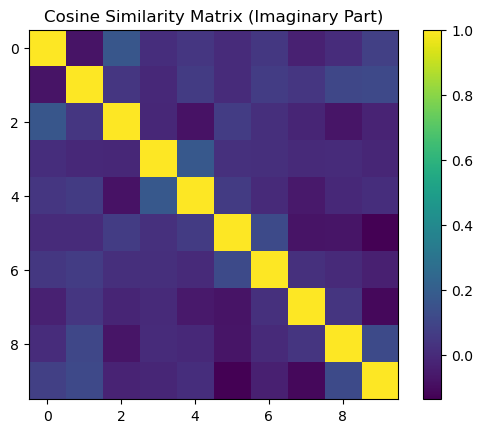

[[ 1.00000000e+00 -7.99092315e-02  1.65888485e-01  1.18515030e-02
   4.14338020e-02  8.11569406e-04  4.71039758e-02 -3.18167559e-02
   7.05871002e-03  7.60239908e-02]
 [-7.99092315e-02  1.00000000e+00  4.03713952e-02 -7.18868374e-03
   6.03270812e-02  3.55370540e-03  6.38537553e-02  4.07651242e-02
   1.05203419e-01  1.15053740e-01]
 [ 1.65888485e-01  4.03713952e-02  1.00000000e+00 -1.00655112e-02
  -8.16163134e-02  6.55893203e-02  1.49879706e-02 -1.89669278e-02
  -7.29062655e-02 -2.37856931e-02]
 [ 1.18515030e-02 -7.18868374e-03 -1.00655112e-02  1.00000000e+00
   1.74227521e-01  1.85545189e-02  1.77916062e-02 -3.15764350e-03
   9.84005896e-04 -1.67413154e-02]
 [ 4.14338020e-02  6.03270812e-02 -8.16163134e-02  1.74227521e-01
   1.00000000e+00  6.12320970e-02 -2.84059128e-03 -6.00618187e-02
  -4.47302857e-03  1.30512300e-02]
 [ 8.11569406e-04  3.55370540e-03  6.55893203e-02  1.85545189e-02
   6.12320970e-02  1.00000000e+00  1.16192549e-01 -7.67937764e-02
  -7.31833624e-02 -1.37751956e-01

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Assuming a_train_0, c_train_1, etc., are defined elsewhere and contain complex numbers
# Take the imaginary part of each array
vectors_imag = np.array([np.imag(a_train_0), np.imag(c_train_1), np.imag(a_train_2), np.imag(a_train_3), np.imag(a_train_4),
                    np.imag(a_train_5), np.imag(a_train_6), np.imag(a_train_7), np.imag(a_train_8), np.imag(a_train_9)])

# Calculate pairwise cosine similarity
cos_sim_matrix_imag = cosine_similarity(vectors_imag)

# Plot cosine similarity matrix for imaginary part
plt.imshow(cos_sim_matrix_imag, cmap='viridis', interpolation='nearest')
plt.title('Cosine Similarity Matrix (Imaginary Part)')
plt.colorbar()
plt.show()

print(cos_sim_matrix_imag)
